In [1]:
import tomotopy as tp
import numpy as np
import pandas as pd
import re
import os
import time
import itertools
import konlpy
from kiwipiepy import Kiwi
from hanspell import spell_checker
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pyLDAvis


In [2]:
df=pd.read_csv('secondary.csv',encoding='utf-8-sig',header=0, dtype={'score':np.str})
df.info()

C:\Users\jenny\AppData\Local\Temp/ipykernel_11356/3728096588.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df=pd.read_csv('secondary.csv',encoding='utf-8-sig',header=0, dtype={'score':np.str})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_title  5035 non-null   object
 1   review        5035 non-null   object
 2   score         5035 non-null   object
 3   real_date     5035 non-null   object
 4   year          5035 non-null   int64 
 5   month         5035 non-null   int64 
 6   type          4558 non-null   object
 7   dataset       4966 non-null   object
dtypes: int64(2), object(6)
memory usage: 314.8+ KB


In [3]:
df['type'].unique()

array([' 친구', ' 커플', nan, ' 비지니스', ' 개인', ' 가족'], dtype=object)

In [4]:
for i in range(len(df)):
    if df.iloc[i,6] in [' 친구',' 가족',' 커플']:
        df.iloc[i,6] = 'no_solo'
    elif df.iloc[i,6] in [' 비지니스', np.NaN]:
        df.iloc[i,6] = np.NaN
    elif df.iloc[i,6] in [' 개인']:
        df.iloc[i,6]='solo'

In [5]:
df['type'].unique()

array(['no_solo', nan, 'solo'], dtype=object)

In [6]:
df.dropna(subset=['type'], how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 5034
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_title  4293 non-null   object
 1   review        4293 non-null   object
 2   score         4293 non-null   object
 3   real_date     4293 non-null   object
 4   year          4293 non-null   int64 
 5   month         4293 non-null   int64 
 6   type          4293 non-null   object
 7   dataset       4233 non-null   object
dtypes: int64(2), object(6)
memory usage: 301.9+ KB


In [7]:
df[df['dataset'].isnull()]

,review_title,review,score,real_date,year,month,type,dataset
354,"세련된 트렌디 한 장소, 특히 밤에","홍대에 위치 하는 곳이나 낮이나 밤에 모두 볼 수 있습니다. 아, 일요일 밤에 가기...",4,2016년 10월,2016,10,no_solo,NaN
362,Q: // partygoer 입니다 scenester 하는 것이 오? 답변: 없습니...,"예, 마음이 넓은 것이 있는 곳이에요, 기대 하고, 한국인들이 만나는 어린 새 x ...",4,2016년 10월,2016,10,no_solo,NaN
397,"유명한, 놓칠 수 없는 위치","원하는 경우 아 독특한 한국 사람들과 편안한 경험인가, 서울 홍대 합니다. 에는 많...",5,2017년 1월,2017,1,no_solo,NaN
587,저는 여기에 있으니까요 - 가방을 도둑맞았어요!,"나는 이 곳 이었을 수도 하면서, 나는 여기에 가지고 있으니까요. 내 가방을 도둑맞...",1,2015년 4월,2015,4,no_solo,NaN
605,한 경험이었다.,"이곳은 꽤 넓은 장소, 하게, 특히 음식, 면 적어도 한 번은 곳, 먹고 싶은 것을...",4,2015년 5월,2015,5,no_solo,NaN
692,이렇게 좁은 광장이라니.. 맛있어서 참는다.,동대문 지나 종로 5가에 오랜 시간 자리잡고 있는 광장시장은 언제부터인지 그 시장 ...,4,2015년 11월,2015,11,no_solo,NaN
777,이 곳을 방문한 식사와 쇼핑을 경험할 수 있는 유명한 서울.,"제 아내와 저는 이 시장을 본 실사 비디오를 보고 싶었는데 이곳 (감사합니다, 수도...",5,2016년 2월,2016,2,no_solo,NaN
793,다시 두 번째 방문,인사동 근처에 위치한 곳이 모두 같은 아침에 방문 할 수 있습니다. 물론 여기에 들...,3,2016년 3월,2016,3,solo,NaN
867,"없어, 가게, 먹고, 사람들을 구경하거나.",즉 개방된 시장이 있는 곳입니다. 제가 느끼기에 좋은 선택을 위한 괜찮은 가격으로 ...,5,2016년 7월,2016,7,no_solo,NaN
885,박 시장,"우리가 여기에 와서 저녁 식사를 위해. 많은 사람들이 하지 않은, 제가 생각해 하루...",5,2016년 9월,2016,9,no_solo,NaN


In [8]:
df.dropna(subset=['dataset'], how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4233 entries, 0 to 5034
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_title  4233 non-null   object
 1   review        4233 non-null   object
 2   score         4233 non-null   object
 3   real_date     4233 non-null   object
 4   year          4233 non-null   int64 
 5   month         4233 non-null   int64 
 6   type          4233 non-null   object
 7   dataset       4233 non-null   object
dtypes: int64(2), object(6)
memory usage: 297.6+ KB


In [9]:
#솔로/비솔로 데이터 구분
#솔로
condition = (df.type=='solo')
df2=df.loc[condition]

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 7 to 5032
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_title  675 non-null    object
 1   review        675 non-null    object
 2   score         675 non-null    object
 3   real_date     675 non-null    object
 4   year          675 non-null    int64 
 5   month         675 non-null    int64 
 6   type          675 non-null    object
 7   dataset       675 non-null    object
dtypes: int64(2), object(6)
memory usage: 47.5+ KB


In [11]:
#응집도 계산 전 사용할 토크나이저 함수 정의

import konlpy
stop_list=['우리','함께','있습니다']
def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if not pos == 'Josa' and not pos =='Punctuation' and not pos =='Foreign' and len(word) > 1 and word not in stop_list :
            words.append(word)
    ## word를 이어붙인 string 형태가 아닌 word의 list를 return해주는 게 sklearn lda 준비 과정과의 차이
            
    return words

In [12]:
#솔로 데이터 토큰화
tokenized_list_solo = []
a=df2['dataset'].values
for text in range(len(a)):
    tokenized_list_solo.append(tokenize_korean_text(a[text]))

In [40]:
#솔로
model = tp.DMRModel(k=20, alpha=0.1, eta=0.01, min_cf=6,rm_top=3,tw=tp.TermWeight.IDF)

key=df2['score'].values
value=tokenized_list_solo


for pairs in zip(key, value):
    try :
        model.add_doc(pairs[1],metadata=pairs[0]) # tokenize함수를 이용해 전처리한 결과를 add_doc에 넣습니다.
    except RuntimeError :
        pass
        
               
model.train(0)
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 

Total docs: 675
Total words: 12814
Vocab size: 559


In [41]:
model.summary()

<Basic Info>
| DMRModel (current version: 0.12.2)
| 675 docs, 12814 words
| Total Vocabs: 4153, Used Vocabs: 559
| Entropy of words: 5.74653
| Entropy of term-weighted words: 6.09728
| Removed Vocabs: 있는 쇼핑 좋은
| Metadata of docs and its distribution
|  5: 290
|  4: 232
|  2: 23
|  3: 117
|  1: 13
|
<Training Info>
| Iterations: 0, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -9.15327
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 6 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 20 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (an initial value of exponential of mean of normal distribution for `lambdas`, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic - word)
| sigma: 1.0 (standard deviation of normal distri

==== Coherence : c ====
Average: 0.4788311045616866 
Per Topic: [0.40847142301499845, 0.45044414028525354, 0.5710870623588562, 0.481118281185627, 0.4443265676498413, 0.42364100366830826, 0.43867287300527097, 0.41089115738868714, 0.5112805552780628, 0.5046257376670837, 0.41106753051280975, 0.47323652878403666, 0.5137786597013474, 0.4908918246626854, 0.469453963637352, 0.5408015638589859, 0.5631222128868103, 0.44282620698213576, 0.49506458044052126, 0.5318202182650567]


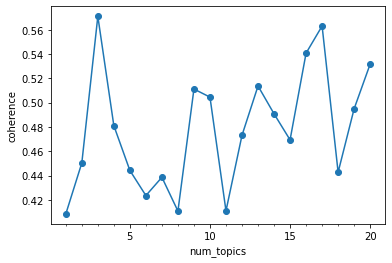

In [42]:
# calculate coherence using preset
ax=plt.axes()
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
print('==== Coherence : c ====')
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
x=range(1,21,1)
plt.plot(x, coherence_per_topic,marker='o')
plt.xlabel("num_topics")
plt.ylabel("coherence")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.show()
print()

위 결과에서 14개일 때 가장 높은 응집도를 보였기 때문에 토픽을 14개로 설정하였다.

In [43]:
#토픽수 정하고 솔로 분석
model = tp.DMRModel(k=3, alpha=0.1, eta=0.01, min_cf=6,rm_top=3,tw=tp.TermWeight.IDF)

key=df2['score'].values
value=tokenized_list_solo

for pairs in zip(key, value):
    try :
        model.add_doc(pairs[1],metadata=pairs[0]) # tokenize함수를 이용해 전처리한 결과를 add_doc에 넣습니다.
    except RuntimeError :
        pass

model.train(0)
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 
 
 
for i in range(200):
    model.train(1)
    
for i in range(model.k):
    res = model.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Total docs: 675
Total words: 12814
Vocab size: 559
Topic #0	외국인, 명동, 관광객, 사람, 너무, 많이, 중국, 같은, 거리, 중국인
Topic #1	상점, 많은, 음식, 지역, 가게, 기념품, 경우, 다른, 하지만, 레스토랑
Topic #2	한국, 인사동, 홍대, 많고, 사람, 방문, 서울, 즐길, 제품, 최고


In [44]:
model.summary()

<Basic Info>
| DMRModel (current version: 0.12.2)
| 675 docs, 12814 words
| Total Vocabs: 4153, Used Vocabs: 559
| Entropy of words: 5.74653
| Entropy of term-weighted words: 6.09728
| Removed Vocabs: 있는 쇼핑 좋은
| Metadata of docs and its distribution
|  5: 290
|  4: 232
|  2: 23
|  3: 117
|  1: 13
|
<Training Info>
| Iterations: 200, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -6.19140
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 6 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 3 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (an initial value of exponential of mean of normal distribution for `lambdas`, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic - word)
| sigma: 1.0 (standard deviation of normal distr

In [45]:
#솔로 감성점수 계산
print('Topic distributions by score, solo')

df4=pd.DataFrame()
score_labels=['1','2','3','4','5']

for i in score_labels:
    df4[i+'score']=model.get_topic_prior(i)
df4['total']=df4.sum(axis=1)

total_sum=df4['total'].values
gamsung_sum=0
gamsung_list=[]

for i in range(model.k):
    a=df4.iloc[i,:-1].values
    gamsung_sum=(a[0]*1+a[1]*2+a[2]*3+a[3]*4+a[4]*5)/total_sum[i]
    gamsung_list.append(gamsung_sum)
    
df4['re_score']=gamsung_list
df4.head(20)

Topic distributions by score, solo


,1score,2score,3score,4score,5score,total,re_score
0,0.284017,0.657815,0.746000,0.261400,0.171925,2.121157,2.707425
1,0.094371,0.043964,1.595300,0.091999,0.758708,2.584341,3.532712
2,0.094192,0.461942,0.552534,0.247800,0.942907,2.299375,3.645082


In [46]:
#각 토픽 별 상위 10개 단어 추출
word_list=[]
for i in range(model.k):
    a=model.get_topic_words(i, top_n=10)
    word_list.append([x[0] for x in a])

df4['word_list']=word_list
df4.head(15)

,1score,2score,3score,4score,5score,total,re_score,word_list
0,0.284017,0.657815,0.746000,0.261400,0.171925,2.121157,2.707425,"[외국인, 명동, 관광객, 사람, 너무, 많이, 중국, 같은, 거리, 중국인]"
1,0.094371,0.043964,1.595300,0.091999,0.758708,2.584341,3.532712,"[상점, 많은, 음식, 지역, 가게, 기념품, 경우, 다른, 하지만, 레스토랑]"
2,0.094192,0.461942,0.552534,0.247800,0.942907,2.299375,3.645082,"[한국, 인사동, 홍대, 많고, 사람, 방문, 서울, 즐길, 제품, 최고]"


In [47]:
 # extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=5, min_df=5, max_len=5, max_cand=10000, normalized=True)
cands = extractor.extract(model)

labeler = tp.label.FoRelevance(model, cands, min_df=5, smoothing=1e-2, mu=0.25)
for k in range(model.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in model.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: 명동, 관광객, 사람, 거리, 외국인
외국인	0.03312159702181816
명동	0.02733948454260826
관광객	0.019180485978722572
사람	0.018645400181412697
너무	0.017997058108448982
많이	0.017936455085873604
중국	0.015914911404252052
같은	0.015722865238785744
거리	0.015111148357391357
중국인	0.014947115443646908

== Topic #1 ==
Labels: 좋은, 상점, 가격, 있는, 다른
상점	0.01388636976480484
많은	0.013755925931036472
음식	0.012524573132395744
지역	0.011106949299573898
가게	0.010501042008399963
기념품	0.009975397028028965
경우	0.009656029753386974
다른	0.009399648755788803
하지만	0.009300066158175468
레스토랑	0.009289532899856567

== Topic #2 ==
Labels: 거리, 있는, 사람, 하는, 한국
한국	0.019017307087779045
인사동	0.014174358919262886
홍대	0.01319916918873787
많고	0.012597422115504742
사람	0.011658051051199436
방문	0.011075563728809357
서울	0.01061148103326559
즐길	0.010522727854549885
제품	0.01039638090878725
최고	0.010031582787632942



In [48]:
#빈도 구하기 전
df5=pd.DataFrame()
df5['docs']=tokenized_list_solo
df5['score']=df2['score'].values
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   docs    675 non-null    object
 1   score   675 non-null    object
dtypes: object(2)
memory usage: 10.7+ KB


In [49]:
#빈도 구하기

topic_num=[]
temp1=[] #토픽번호
temp2=[] #분포율
for i in range(len(model.docs)):
    a=model.docs[i].get_topics()
    temp1.append([x[0] for x in a])
    temp2.append([x[1] for x in a])
for i in range(len(temp1)):
    if temp2[i][0] >= 0.5:
        topic_num.append(temp1[i][0])
    else :
        topic_num.append(np.NaN)
df5['topic_num']=topic_num
df5[df5['topic_num'].isnull()]

,docs,score,topic_num
1,"[먹지, 장소, 매일, 아주, 사람, 많은, 사람, 여기, 다방, 홍대, 카페, 거...",5,NaN
5,"[대학, 생활, 있는, 시간, 서울대학교, 학생, 무엇, 궁금해하는, 거리, 홍대,...",5,NaN
14,"[젊음, 그리고, 생동감, 최신, 유행, 가장, 빨리, 느낄, 있고, 젊음, 기운,...",5,NaN
16,"[산책, 쇼핑, 홍대, 있는, 먹고, 많은, 건지, 가게, 좋은, 레스토랑, 상점,...",5,NaN
28,"[명실, 젊음, 거리, 홍대, 점점, 좋아지는, 이유, 공항, 철도, 놓인, 같습니...",5,NaN
...,...,...,...
658,"[좋은, 특별히, 사람, 랍스터, 리뷰, 사람, 랍스터, 월요일, 나오는, 새우, ...",5,NaN
663,"[롯데, 월드, 주차, 아무, 생각, 없이, 주차, 해놓으면, 차비, 어마어마해서,...",3,NaN
671,"[롯데, 월드, 타워, 영화, 보러, 갔었다, 영화관, 많아서, 여러, 가지, 영화...",3,NaN
673,"[볼거리, 먹거리, 즐길, 거리, 많은, 볼거리, 먹거리, 즐길, 거리, 많은, 쇼...",5,NaN


In [50]:
df6=df5.groupby(['topic_num','score'])['docs']
print(df6.size().reset_index(name='counts'))

    topic_num score  counts
0         0.0     1       4
1         0.0     2       6
2         0.0     3      15
3         0.0     4      15
4         0.0     5      13
5         1.0     1       7
6         1.0     2      10
7         1.0     3      53
8         1.0     4     130
9         1.0     5     178
10        2.0     1       1
11        2.0     2       5
12        2.0     3      15
13        2.0     4      47
14        2.0     5      54
